<a href="https://colab.research.google.com/github/marquesgabi/ANN/blob/master/ANN_Image_Processig/class_image_processing_smart_trash.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import pandas as pd
import random
import zipfile
from matplotlib import pyplot as plt
import skimage.feature
from string import digits
import seaborn as sns
import skimage

In [2]:
!gdown 1L4mdCDBgybKqr5Wo-kqT8HXcBJ9HXqSX

Downloading...
From: https://drive.google.com/uc?id=1L4mdCDBgybKqr5Wo-kqT8HXcBJ9HXqSX
To: /content/trash_nov_22_2018.zip
100% 42.8M/42.8M [00:00<00:00, 204MB/s]


In [3]:
FILE='trash_nov_22_2018.zip'

In [4]:
archive = zipfile.ZipFile('trash_nov_22_2018.zip', 'r')
archive.extractall()

In [5]:
# abre o arquivo zipado e coloca todas as imagens em img_name, pegando o nome de cada imagem
img_name=[]
with zipfile.ZipFile(FILE, "r") as f:
    for name in f.namelist():
        img_name.append(name)

In [6]:

Img_Size = 40
ref = 'jpg'
notref = 'met'

In [7]:
#esse cmd pega do arquivo somente o que é foto jpg. Armazena as fotos numa matriz, variável X as fotos e variável Y o nome das fotos.
X= []  
Y =[]
n = len(img_name)
i = 0
for i in range(n):
  name = img_name[i]
  if(ref in name): 
    Y.append(name)
#lê as fotos em preto e branco por causa do zero. matriz 2x2 escala preto e branco
    X.append(cv2.imread(name,0))
m = len(Y)
print(n,m)

2527 2527


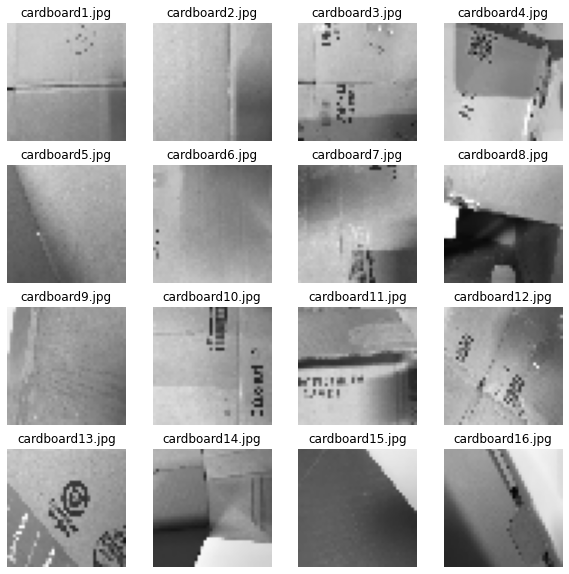

In [8]:
#plotar as imagens em preto e branco e definir um tamanho padrão pra elas de 10x10
plt.figure(figsize=(10, 10))
X_test = X
Y_test = Y
for i in range(16): 
  ax = plt.subplot(4, 4, i + 1)
  RGB_img = cv2.cvtColor(X_test[i], cv2.COLOR_BGR2RGB)
  resized = cv2.resize(RGB_img, (Img_Size,Img_Size))
  plt.imshow(resized)
  plt.title(Y_test[i])
  plt.axis("off")

In [9]:
# biblioteca (skimage) com algumas funções 
g = skimage.feature.greycomatrix(X[0], [1, 2], [0, np.pi/2], levels=255,normed=True, symmetric=True)
#propriedades que essa biblioteca vai utilizar
glcm_names =['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
glcm =[] #matriz de ocorrência em níveis de cinza
# see https://github.com/ucfilho/ANN/blob/master/ANN_2022/Image/class_001_image_processing_smart_trash_bin_012.ipynb

for x in glcm_names:
  prop = skimage.feature.greycoprops(g, x)
  glcm.append(np.max(prop))


print(glcm)

[76.67184943553663, 3.8348893570026195, 0.48371336250089464, 0.041509031676850994, 0.9899797711903227, 0.0017229997107498193]


In [10]:
# read the paper: 
# Discriminating rapeseed varieties using computer vision and machine learning
# F. Kurtulmus, H. ÃƒÂœnal / Expert Systems with Applications 42 (2015) 1880Ã¢Â€Â“1891

In [11]:
m = skimage.exposure.rescale_intensity(X[1000], in_range='image', out_range='dtype')
g = skimage.feature.greycomatrix(m, [1, 2], [0, np.pi/2], levels=256, normed=True, symmetric=True)
glcm_names =['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']
glcm =[]
# see https://github.com/ucfilho/ANN/blob/master/ANN_2022/Image/class_001_image_processing_smart_trash_bin_012.ipynb

for x in glcm_names:
  prop = skimage.feature.greycoprops(g, x)
  glcm.append(np.max(prop))


print(glcm)

[370.0416240592274, 7.213214869281038, 0.5907514116474932, 0.07141249134554789, 0.982188674848156, 0.005099743920177952]


In [12]:
np.max(X[3])

255

In [13]:

glcm_names =['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation', 'ASM']

# see https://github.com/ucfilho/ANN/blob/master/ANN_2022/Image/class_001_image_processing_smart_trash_bin_012.ipynb
features =[]
for i in range(len(img_name)):
  glcm =[]
  m = skimage.exposure.rescale_intensity(X[i], in_range='image', out_range='dtype')
  g = skimage.feature.greycomatrix(m, [1, 2], [0, np.pi/2], levels=256,normed=True, symmetric=True)
  for x in glcm_names:
    prop = skimage.feature.greycoprops(g, x)
    glcm.append(np.max(prop))
  features.append(glcm)

df = pd.DataFrame(features,columns=glcm_names)

In [14]:
df.head()

,contrast,dissimilarity,homogeneity,energy,correlation,ASM
0,100.285841,4.381309,0.461713,0.041509,0.989934,0.001723
1,100.720787,6.039139,0.356470,0.035720,0.997310,0.001276
2,341.852161,6.814918,0.487461,0.040566,0.980984,0.001646
3,374.947181,6.263133,0.644212,0.067136,0.977153,0.004507
4,47.916999,4.853743,0.351147,0.032939,0.996115,0.001085


In [15]:
df.shape

(2527, 6)

In [16]:
n =len(img_name)
tipos = []
selected = 'find'
for x in img_name:
  result =''.join([i for i in x[:-4] if not i.isdigit()]) #O join serve para pegar os nomes e retirar os ultimos 4 dígitos que são: .jpg
  if(result != selected):
    selected = result
    tipos.append(selected)


In [17]:
'''
isso dá erro pq ele nao consegue substituir o r por t na palavra cardboard pq é um string
x = 'cardboard'
x[2] = 't'
x 

isso dá certo pq nao é um string. daí ele substitui o 3 por 10
x = [1,2,3,4,5]
x[2] = 10
x
'''

"\nisso dá erro pq ele nao consegue substituir o r por t na palavra cardboard pq é um string\nx = 'cardboard'\nx[2] = 't'\nx \n\nisso dá certo pq nao é um string. daí ele substitui o 3 por 10\nx = [1,2,3,4,5]\nx[2] = 10\nx\n"

In [18]:
tipos #lista com os nomes sem os 4 ultimos dígitos. definir as classes 

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [19]:
#cmd tá pegando o nome e colocando o número na frente. td o que for cardboard ele vai colocar 0, glass 1...
label =[]
for name in img_name:
  for idx, x in enumerate(tipos):
    if(x in name):
      label.append(idx)

In [20]:
len(label),len(img_name)

(2527, 2527)

In [21]:
df['target']=label

In [22]:
df.head()

,contrast,dissimilarity,homogeneity,energy,correlation,ASM,target
0,100.285841,4.381309,0.461713,0.041509,0.989934,0.001723,0
1,100.720787,6.039139,0.356470,0.035720,0.997310,0.001276,0
2,341.852161,6.814918,0.487461,0.040566,0.980984,0.001646,0
3,374.947181,6.263133,0.644212,0.067136,0.977153,0.004507,0
4,47.916999,4.853743,0.351147,0.032939,0.996115,0.001085,0


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


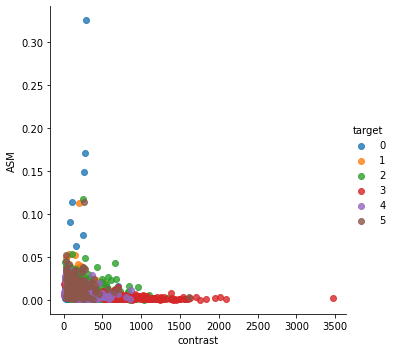

In [23]:
sns.lmplot('contrast', 'ASM', data=df, hue='target',fit_reg=False) 
plt.show()

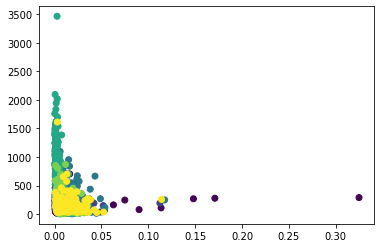

In [24]:
plt.scatter(df['ASM'],df['contrast'],c=df['target'])